In [4]:
import numpy as np
import scipy as sp
from scipy import stats #从scipy导入stats模块
import pandas as pd
import statsmodels 
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

# Numpy
Numpy主要用于处理数组（Array）的数据分析。本门课主要使用numpy内置的数学函数与统计函数（如计算平均值、方差、标准差等）

## 创建数据

In [30]:
np.linspace(1,100,10) #在1~100的范围内生成均匀分布的10个数字

array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])

## 抽样

In [31]:
data = range(1,101)
np.random.choice(data, size=10,replace=True)

array([19,  1, 69, 63,  5, 17, 17, 66, 89, 54])

## 统计功能

In [2]:
sample_array = np.array([1,2,3,4,5])#将列表转化为数组
sample_array

array([1, 2, 3, 4, 5])

In [3]:
np.mean(sample_array)#平均值

3.0

In [4]:
np.std(sample_array,ddof=0)#总体标准差

1.4142135623730951

In [5]:
np.std(sample_array,ddof=1)#样本标准差；ddof：

1.5811388300841898

In [6]:
np.max(sample_array)

e:\installation\Anaconda\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


5

In [7]:
np.min(sample_array)

1

In [8]:
np.median(sample_array)

3.0

In [9]:
np.var(sample_array,ddof=0)#总体方差

2.0

In [10]:
np.var(sample_array,ddof=1)#样本方差

2.5

# Scipy

基于Numpy开发的，本门课主要使用其stats模块。本门课程使用场景：（1）计算各类分布的概率; （2）绘制各类分布图辅助；（3）独立样本t检验、卡方检验等统计分析

## cdf
cdf: **c**umulative **d**istribution **f**unction 累计分布函数，即求左侧概率

In [11]:
# 某数据服从正态分布，且均值为100，标准差为10.求P(X < 75)
stats.norm.cdf(x=75, loc=100,scale=10)

0.006209665325776132

## ppf
ppf：Percent point function 求百分位数（即知道概率求分界线）

In [12]:
# 某数据服从正态分布，且均值为100，标准差为10.已知P(X < X_0)=0.98，求X_0的值
stats.norm.ppf(q = 0.98,loc =100, scale =10)

120.53748910631822

In [13]:
stats.norm.ppf(q = 0.025)

-1.9599639845400545

## pdf
pdf: probability density function （概率密度函数）

可理解为：当数据服从某分布时，知道X，用pdf可求出Y的取值。本课程主要用该方法来绘制概率分布图


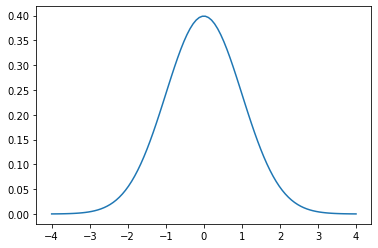

In [11]:
x = np.linspace(-4,4,100)# 生成从-4~4均匀分布的100个数值
y = stats.norm.pdf(x,0,1)
plt.plot(x,y)

In [7]:
stats.norm.pdf(x=1)

0.24197072451914337

## t分布、f分布、卡方分布：cdf,ppf,pdf

同理，t分布、f分布、卡方分布一样都可以用cdf, ppf, pdf的函数

### t分布

In [14]:
stats.t.ppf(q = 0.025,df =9)#求t分布的临界值（α=0.05）；另外一个临界值为该值的相反数

-2.262157162740992

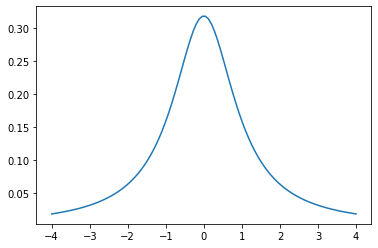

In [14]:
x = np.linspace(-4,4,100)
y = stats.t.pdf(x,df = 1)
plt.plot(x,y)

### F分布

In [15]:
stats.f.ppf(q = 0.025,dfn =9 ,dfd=9)#求f分布的临界值（α=0.05）；另外一个临界值为该值的倒数

0.24838585469445487

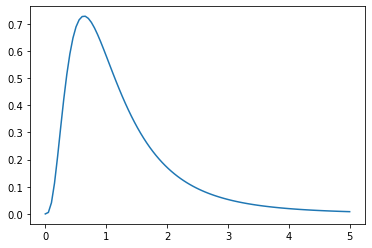

In [17]:
x = np.linspace(0,5,100)
y = stats.f.pdf(x,dfn = 9, dfd = 9)
plt.plot(x,y)

### 卡方分布

In [16]:
stats.chi2.ppf(q = 0.95,df =1 )#求卡方分布的临界值（α=0.05）

3.841458820694124

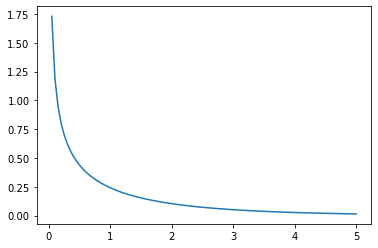

In [29]:
x = np.linspace(0,5,100)
y = stats.chi2.pdf(x,df = 1)
plt.plot(x,y)

# Pandas

主要用来处理表格数据

## 创建DataFrame（数据帧）

In [17]:
sample_df = pd.DataFrame({
    'col1' : sample_array, 
    'col2' : sample_array * 2,
    'col3' : ["A", "B", "C", "D", "D"]
})

In [18]:
sample_df #0-4为index

,col1,col2,col3
0,1,2,A
1,2,4,B
2,3,6,C
3,4,8,D
4,5,10,D


## 读取文件中的数据


In [23]:
file_data = pd.read_excel("https://raw.githubusercontent.com/zhiliang-lin/survey_and_stats/main/sati-survey/data/inm.xlsx")


URLError: <urlopen error [Errno 11004] getaddrinfo failed>

## DataFrame的列操作


In [22]:
sample_df

,col1,col2,col3
0,1,2,A
1,2,4,B
2,3,6,C
3,4,8,D
4,5,10,D


In [ ]:
sample_df.col2

0     2
1     4
2     6
3     8
4    10
Name: col2, dtype: int32

In [ ]:
sample_df["col2"]

0     2
1     4
2     6
3     8
4    10
Name: col2, dtype: int32

In [ ]:
sample_df[["col2", "col3"]]#选择两列

,col2,col3
0,2,A
1,4,B
2,6,C
3,8,D
4,10,E


In [26]:
sample_df.iloc[:,1:3]#通过行列序号来选择数据

,col2,col3
0,2,A
1,4,B
2,6,C
3,8,D
4,10,D


## DataFrame的行操作

In [ ]:
sample_df.head(n=3)#看前3行数据

,col1,col2,col3
0,1,2,A
1,2,4,B
2,3,6,C


In [ ]:
sample_df[sample_df.col2 > 4]

,col1,col2,col3
2,3,6,C
3,4,8,D
4,5,10,E


In [ ]:
sample_df.iloc[0:3]#前3行

,col1,col2,col3
0,1,2,A
1,2,4,B
2,3,6,C


## DataFrame的统计分析

In [ ]:
sample_df['col3'].value_counts()#对类别型变量进行频数分析

D    2
A    1
B    1
C    1
Name: col3, dtype: int64

In [ ]:
sample_df["col1"].mean()

3.0

In [ ]:
sample_df["col1"].var()#注意这是样本方差

2.5

In [ ]:
sample_df["col1"].std()

1.5811388300841898

## DataFrame的分类汇总

In [ ]:
sample_df.groupby(by = "col3").mean()

,col1,col2
col3,,
A,1.0,2.0
B,2.0,4.0
C,3.0,6.0
D,4.5,9.0


In [ ]:
pd.pivot_table(sample_df,index=["col3"],values=["col1","col2"],aggfunc=np.mean)

,col1,col2
col3,,
A,1.0,2
B,2.0,4
C,3.0,6
D,4.5,9


# Statsmodels
本门课主要在回归分析部分用到

# pingouin
相对前面的包不是很有名，但是有的统计方法前述包没有涉及到，该包是一个比较好的补充。

# Matplotlib
画图用的，画的图不是特别好看，但胜在灵活性较高。本课程在绘制各种概率分布图主要使用Matplotlib

- `plt.hist()`

(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

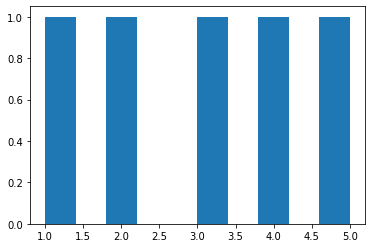

In [ ]:
plt.hist(sample_df.col1)
# plt.xlabel("col1")#添加X轴标签
# plt.ylabel("freq")#添加Y轴标签
# plt.title("histgram of col1")#添加标题


<AxesSubplot: ylabel='Frequency'>

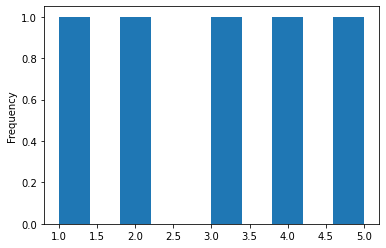

In [ ]:
sample_df["col1"].plot.hist()

In [ ]:
table = sample_df.value_counts("col3")
table

col3
D    2
A    1
B    1
C    1
dtype: int64

<AxesSubplot: >

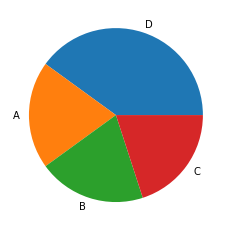

In [ ]:
table.plot.pie()

<AxesSubplot: xlabel='col3'>

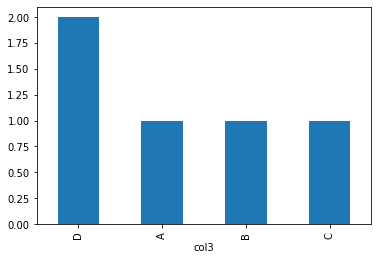

In [ ]:
table.plot.bar()

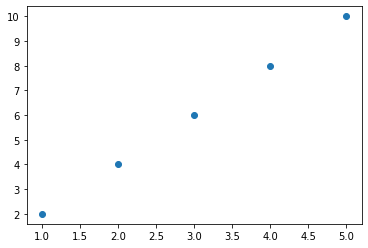

In [ ]:
plt.scatter(sample_df.col1,sample_df.col2)

# Seaborn
语法较matplotlib简洁，画出来的图也比较漂亮，用来画统计相关的图表比较matplotlib更漂亮

<AxesSubplot: xlabel='col1', ylabel='Count'>

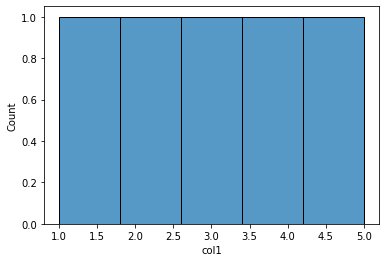

In [ ]:
sns.histplot(x = "col1", data=sample_df,bins=5)#“bins=5”是指箱子的数量为5

<AxesSubplot: xlabel='col3', ylabel='count'>

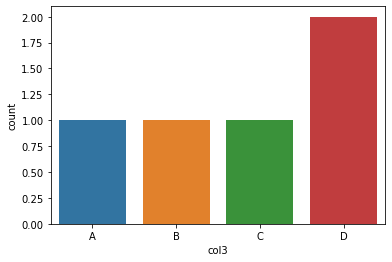

In [ ]:
sns.countplot(x = "col3", data=sample_df) #barplot

- `sns.scatterplot()`

<AxesSubplot: xlabel='col1', ylabel='col2'>

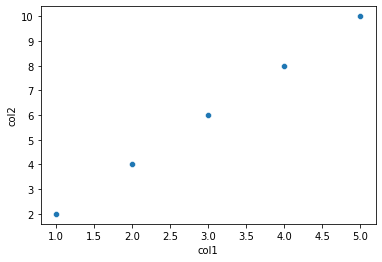

In [ ]:
sns.scatterplot(x="col1", y="col2",data=sample_df)# 散点图

# 其它
部分地方使用Python内置的包，如在正态分布部分使用到statistics